In [2]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data analysis


- We will not be considering authors with only 1 review
- author playtime at review: this will be valued as we assume that players with longer playtime are more credible with their reviews
-recommended: if a review was recommended or not
-votes_funny/votes_helpful: we shall analyze if votes_funny has higher correlation with comment count
-comment count: is an important metrics as it signifies that the review is a discussion starter and is engaging

Ranking the KPIS: (current assumption)

1. Votes helpful -30%
2. votes funny -20%
3. comments - 15%
4. recommended - 15%
5. author playtime at review -10%
6. author number of games -10%



In [3]:
# Function to filter out non-character entities
def negative_comments(sentence_list, negative_list):
    return [sent for sent in sentence_list 
            if sent in negative_list]

In [4]:
def kpi_weights(table,one,two,three,four,five,six):
  table['Custom_score']=table[one]*.30+table[two]*.20+table[three]*.15+table[four]*.15+table[five]*.10+table[six]*.10
  return table['Custom_score']


In [5]:

def lowercase(listl):
  lister=[]
  for i in range(len(listl)):
    listl[i] = listl[i].lower()
    lister.append(listl[i])
  return lister


In [6]:
def convert(lst):
    return (lst.split())
    
 

In [132]:
all_tables=pd.read_csv('/content/drive/MyDrive/Data science Data files/all_tables_joined.csv')
game_table=pd.read_csv('/content/drive/MyDrive/Data science Data files/game_info.csv')
#all_tables.sort_values(by='author num_reviews',ascending=False)

In [149]:
#game_table=game_table.drop('app_id',axis=1)
game_table

,review_id,app_name
0,68675252,The Elder Scrolls V: Skyrim Special Edition
1,68675154,The Elder Scrolls V: Skyrim Special Edition
2,68674806,The Elder Scrolls V: Skyrim Special Edition
3,68673945,The Elder Scrolls V: Skyrim Special Edition
4,68673504,The Elder Scrolls V: Skyrim Special Edition
...,...,...
999995,47310228,Just Cause 4
999996,47310217,Just Cause 4
999997,47310195,Just Cause 4
999998,47310155,Just Cause 4


In [134]:
all_tables = all_tables[all_tables['review'].notnull()]


In [135]:
all_tables['review']=all_tables['review'].apply(lambda x: convert(x))

In [136]:
all_tables['review']=all_tables['review'].apply(lambda x: lowercase(x))

In [11]:
my_file = open("/content/drive/MyDrive/Data science Data files/negative-words.txt", encoding = "ISO-8859-1")
  
# reading the file
data = my_file.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
data_into_list = data.replace('\n', ' ').split()

In [13]:
#all_tables['NegativeKeywords']=all_tables['review'].apply(lambda x: negative_comments(x,data_into_list))

In [48]:
list3 = set(all_tables['review'][8])&set(data_into_list)

list4 = sorted(list3, key = lambda k : all_tables['review'][8].index(k))

In [51]:
Negatives=[]
for i in all_tables['review']:
  list3 = set(i)&set(data_into_list)

  list4 = sorted(list3, key = lambda k : i.index(k))
  Negatives.append(list4)
  

In [137]:
all_tables['Negative_comments']=Negatives

In [138]:
all_tables.to_csv('With_negative_comments',index=False)

In [148]:
all_tables['app_id']

0         489830
1         489830
2         489830
3         489830
4         489830
           ...  
432286    304390
432287    304390
432288    304390
432289    304390
432290    304390
Name: app_id, Length: 431647, dtype: int64

In [152]:
all_tables=pd.merge(left=all_tables,right=game_table,on='review_id',how='inner')
all_tables.head(5)

,review_id,author steamid,author num_games_owned,author num_reviews,author playtime_forever,author playtime_last_two_weeks,author playtime_at_review,author last_played,steam_purchase,received_for_free,...,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase.1,received_for_free.1,written_during_early_access.1,Negative_comments,app_name
0,68674806,76561198282201987,17,9,3166.0,0.0,2633.0,1.603555e+09,True,False,...,1,1,0,0.52381,0,True,False,False,[],The Elder Scrolls V: Skyrim Special Edition
1,68673945,76561199016358734,3,2,6579.0,0.0,3569.0,1.608999e+09,False,False,...,1,0,0,0.00000,0,False,False,False,[],The Elder Scrolls V: Skyrim Special Edition
2,68673504,76561198125284145,1001,46,199.0,0.0,65.0,1.590811e+09,False,False,...,1,0,0,0.00000,0,False,False,False,[],The Elder Scrolls V: Skyrim Special Edition
3,68673403,76561198270161210,35,4,401.0,0.0,401.0,1.586809e+09,False,False,...,1,1,0,0.52381,0,False,False,False,[],The Elder Scrolls V: Skyrim Special Edition
4,68670882,76561198236134140,39,5,10588.0,0.0,10441.0,1.593180e+09,False,True,...,1,0,0,0.00000,0,False,True,False,[],The Elder Scrolls V: Skyrim Special Edition


In [154]:
# lets create a column where rows with negative comments are marked as 1 
has_negative=[]
for i in all_tables['Negative_comments']:
  if len(i)>0:
    has_negative.append(1)
  else:
    has_negative.append(0)

In [155]:
all_tables['No.negatives']=has_negative

In [ ]:
#all_tables.groupby('author steamid').max()

1. Votes helpful -30%
2. votes funny -20%
3. comments - 15%
4. recommended - 15%
5. author playtime at review -10%
6. author number of games -10%

In [156]:
kpi_weights(all_tables,'votes_helpful','votes_funny','comment_count','recommended','author playtime_at_review','author num_games_owned')

0          265.45
1          357.35
2          106.75
3           44.05
4         1048.15
           ...   
431642     406.70
431643     495.20
431644    1116.55
431645     189.65
431646     179.55
Name: Custom_score, Length: 431647, dtype: float64

In [74]:
all_tables_count=all_tables.groupby('author steamid')['review_id'].count().reset_index()
all_tables_count.sort_values(by='review_id',ascending=False)

,author steamid,review_id
276507,76561198239163744,7
90580,76561198045381877,6
355486,76561198395696622,5
19176,76561197989746995,5
75652,76561198036080286,5
...,...,...
141917,76561198077313413,1
141916,76561198077312181,1
141915,76561198077308785,1
141914,76561198077308602,1


In [76]:
all_tables_count_greater_than_1=all_tables_count[all_tables_count['review_id']>1]
all_tables_count_greater_than_1

,author steamid,review_id
3,76561197960269409,2
6,76561197960270613,2
10,76561197960271994,2
13,76561197960272871,2
41,76561197960280726,2
...,...,...
415685,76561199083686580,2
415938,76561199088304552,2
416390,76561199099400523,2
416559,76561199105863410,2


In [82]:
all_tables_sum=all_tables.groupby('author steamid')['Custom_score','No.negatives'].sum().reset_index()
all_tables_sum.sort_values(by='Custom_score',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,author steamid,Custom_score,No.negatives
272007,76561198219691523,8.589954e+08,1
289528,76561198264553229,8.589943e+08,2
207832,76561198129993136,8.589943e+08,0
134254,76561198072356405,8.589942e+08,1
34638,76561198004210497,8.589941e+08,0
...,...,...,...
47680,76561198014005830,0.000000e+00,1
330731,76561198341817412,0.000000e+00,0
321464,76561198323409153,0.000000e+00,0
269455,76561198214310307,0.000000e+00,0


In [157]:
#all_tables_max=all_tables.groupby('author steamid')['app_name'].max().reset_index()

In [158]:
all_tables_max

,author steamid,app_name
0,76561197960267064,For Honor
1,76561197960269294,NieR:Automata™
2,76561197960269348,The Elder Scrolls V: Skyrim Special Edition
3,76561197960269409,NieR:Automata™
4,76561197960269445,Bless Online
...,...,...
416963,76561199130140106,House Flipper
416964,76561199130277081,The Elder Scrolls V: Skyrim Special Edition
416965,76561199130933223,House Flipper
416966,76561199131060509,House Flipper


In [164]:
#all_tables_merged=pd.merge(left=all_tables_merged,right=all_tables_max,on='author steamid',how='inner')
#all_tables_merged=all_tables_merged.drop('app_name_y',axis=1)
all_tables_merged=all_tables_merged.sort_values(by='Custom_score',ascending=False)
all_tables_merged

,author steamid,review_id,Custom_score,No.negatives,Has negative,app_name_x
0,76561198264553229,2,8.589943e+08,2,1,For Honor
1,76561198025472785,2,8.589940e+08,2,1,Surviving Mars
2,76561198107935655,2,8.589938e+08,0,0,The Elder Scrolls V: Skyrim Special Edition
3,76561198173159857,2,8.589938e+08,1,1,The Elder Scrolls V: Skyrim Special Edition
4,76561198046494905,2,3.407620e+04,1,1,SOULCALIBUR VI
...,...,...,...,...,...,...
13599,76561198346901233,2,1.920000e+01,0,0,The Elder Scrolls V: Skyrim Special Edition
13600,76561198073141397,2,1.865000e+01,1,1,The Elder Scrolls V: Skyrim Special Edition
13601,76561199099400523,2,1.675000e+01,0,0,SOULCALIBUR VI
13602,76561198275740011,2,1.550000e+01,0,0,The Elder Scrolls V: Skyrim Special Edition


In [90]:
has_negative=[]
for i in all_tables_merged['No.negatives']:
  if (i>0):
    has_negative.append(1)
  else:
    has_negative.append(0)

In [92]:
all_tables_merged['Has negative']=has_negative
all_tables_merged

,author steamid,review_id,Custom_score,No.negatives,Has negative
10923,76561198264553229,2,8.589943e+08,2,1
2555,76561198025472785,2,8.589940e+08,2,1
7282,76561198107935655,2,8.589938e+08,0,0
9558,76561198173159857,2,8.589938e+08,1,1
3797,76561198046494905,2,3.407620e+04,1,1
...,...,...,...,...,...
12201,76561198346901233,2,1.920000e+01,0,0
5495,76561198073141397,2,1.865000e+01,1,1
13601,76561199099400523,2,1.675000e+01,0,0
11108,76561198275740011,2,1.550000e+01,0,0


Top X author id according to our kpi and limitations. Interesetingly, Negative comments appear to have big custom scores.

In [124]:
def topX(table,top_n):
  print ('The number of author with negative comments are',table[0:top_n]['Has negative'].sum(), 'Amongst the top 10,',table[0:10]['Has negative'].sum(),'have negative comments')
  topx=table[0:top_n].reset_index()
  topx=topx.drop('index',axis=1)
  return topx
  

In [165]:
top200=topX(all_tables_merged,200)
top200

The number of author with negative comments are 93 Amongst the top 10, 6 have negative comments


,author steamid,review_id,Custom_score,No.negatives,Has negative,app_name_x
0,76561198264553229,2,8.589943e+08,2,1,For Honor
1,76561198025472785,2,8.589940e+08,2,1,Surviving Mars
2,76561198107935655,2,8.589938e+08,0,0,The Elder Scrolls V: Skyrim Special Edition
3,76561198173159857,2,8.589938e+08,1,1,The Elder Scrolls V: Skyrim Special Edition
4,76561198046494905,2,3.407620e+04,1,1,SOULCALIBUR VI
...,...,...,...,...,...,...
195,76561198058345272,2,5.369050e+03,1,1,The Elder Scrolls V: Skyrim Special Edition
196,76561198844447161,2,5.342700e+03,1,1,The Elder Scrolls V: Skyrim Special Edition
197,76561198042044934,3,5.297600e+03,3,1,The Elder Scrolls V: Skyrim Special Edition
198,76561198241220336,2,5.276550e+03,0,0,The Elder Scrolls V: Skyrim Special Edition


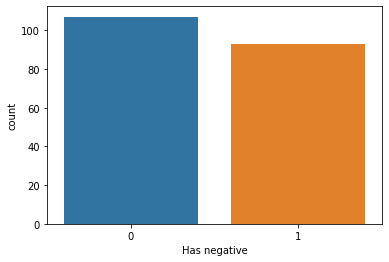

In [126]:
sns.countplot(data=top200,x='Has negative')

Top reviewed games by authors

In [ ]:
df['Surface'].value_counts().index.tolist()

In [179]:
order=(top200['app_name_x'].value_counts()).index.tolist()

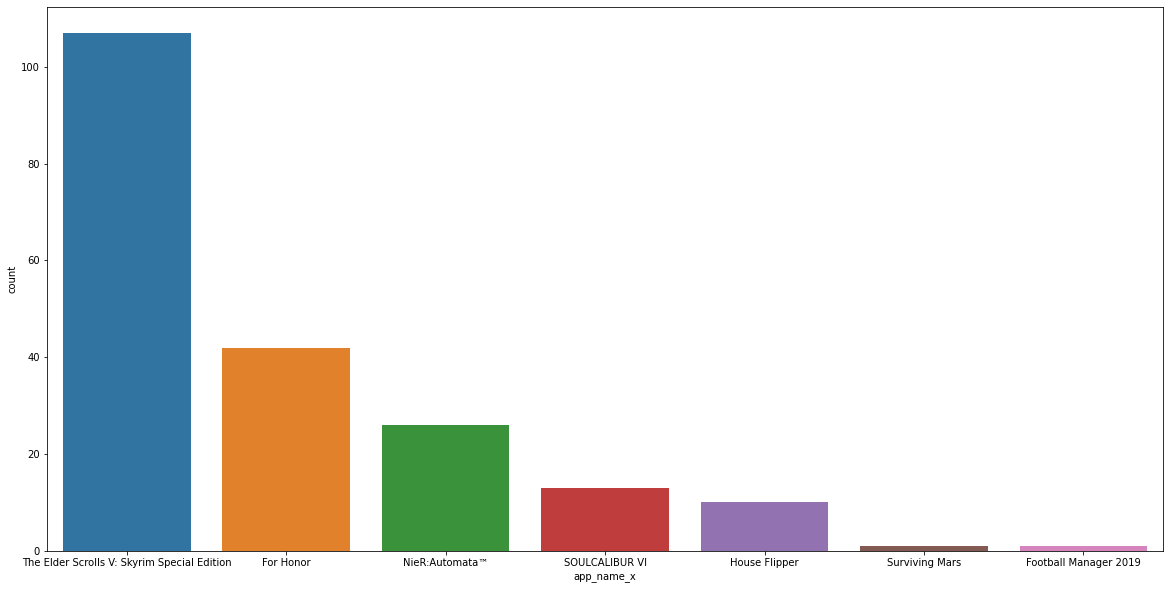

In [180]:
plt.figure(figsize=(20,10))
sns.countplot(data=top200,x='app_name_x',order=order)

As we can see votes_helpful has the biggest positive correlation to comment count. Which means helpful votes are most engaging

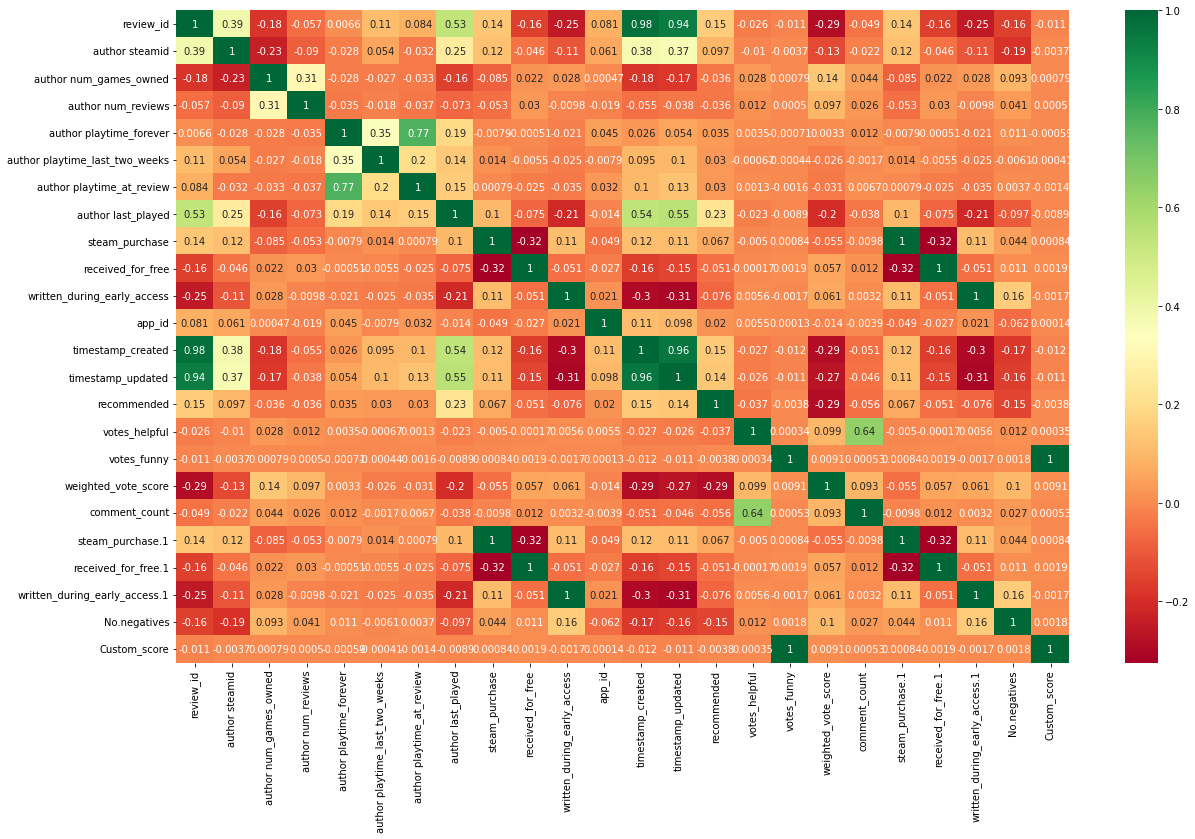

In [190]:
plt.figure(figsize=(20,12))
sns.heatmap(all_tables.corr(),annot=True, cmap='RdYlGn')